In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('M1_final.csv')
dataset.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,N983NN,ORD,-1,161,740,359,...,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,N107NN,LAX,-1,373,2475,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,N274JB,BUF,-5,80,301,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,N663JB,LGB,0,368,2465,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,N283JB,FLL,3,184,1069,370,...,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [4]:
dataset['TAXI_OUT'].mean()

20.85857043719639

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [6]:
# converting Dew Point values from string to numeric
dataset["Dew Point"] = pd.to_numeric(dataset["Dew Point"], errors = 'coerce')

# dropping rows with null values
dataset.dropna(inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27093 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              27093 non-null  int64  
 1   DAY_OF_MONTH       27093 non-null  int64  
 2   DAY_OF_WEEK        27093 non-null  int64  
 3   OP_UNIQUE_CARRIER  27093 non-null  object 
 4   TAIL_NUM           27093 non-null  object 
 5   DEST               27093 non-null  object 
 6   DEP_DELAY          27093 non-null  int64  
 7   CRS_ELAPSED_TIME   27093 non-null  int64  
 8   DISTANCE           27093 non-null  int64  
 9   CRS_DEP_M          27093 non-null  int64  
 10  DEP_TIME_M         27093 non-null  int64  
 11  CRS_ARR_M          27093 non-null  int64  
 12  Temperature        27093 non-null  int64  
 13  Dew Point          27093 non-null  float64
 14  Humidity           27093 non-null  int64  
 15  Wind               27093 non-null  object 
 16  Wind Speed         270

In [7]:
dataset1 = dataset.copy() # for Label Encoding
dataset2 = dataset.copy() # for One Hot Encoding

# getting columns of object type
ObjList = dataset1.select_dtypes(include = "object").columns
print(ObjList)

Index(['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Wind', 'Condition'], dtype='object')


# Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset1[ObjList] = dataset1[ObjList].apply(le.fit_transform)
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27093 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              27093 non-null  int64  
 1   DAY_OF_MONTH       27093 non-null  int64  
 2   DAY_OF_WEEK        27093 non-null  int64  
 3   OP_UNIQUE_CARRIER  27093 non-null  int32  
 4   TAIL_NUM           27093 non-null  int32  
 5   DEST               27093 non-null  int32  
 6   DEP_DELAY          27093 non-null  int64  
 7   CRS_ELAPSED_TIME   27093 non-null  int64  
 8   DISTANCE           27093 non-null  int64  
 9   CRS_DEP_M          27093 non-null  int64  
 10  DEP_TIME_M         27093 non-null  int64  
 11  CRS_ARR_M          27093 non-null  int64  
 12  Temperature        27093 non-null  int64  
 13  Dew Point          27093 non-null  float64
 14  Humidity           27093 non-null  int64  
 15  Wind               27093 non-null  int32  
 16  Wind Speed         270

In [9]:
from sklearn.model_selection import train_test_split

x = dataset1.iloc[:,:-1].values
y = dataset1.iloc[:,-1].values

# splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [10]:
# featuring data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_feat = ss.fit_transform(x_train)
x_test_feat = ss.transform(x_test)

## Linear Regression with Label Encoding

In [14]:
from sklearn.metrics import mean_squared_error as mse


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_feat,y_train)
pred_lr = lr.predict(x_test_feat)
mse_lr = mse(y_test, pred_lr, squared = False)
print("error for Linear Regression = {}".format(mse_lr))


error for Linear Regression = 6.629789455945679


## Ridge Regression with Label Encoding

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(x_train_feat, y_train)
pred_ridge = ridge.predict(x_test_feat)
mse_ridge = mse(y_test, pred_ridge, squared = False)
print("error for Ridge Regression = {}".format(mse_ridge))

error for Ridge Regression = 6.629729489374696


## Lasso Regression with Label Encoding

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.5)
lasso.fit(x_train_feat, y_train)
pred_lasso = lasso.predict(x_test_feat)
mse_lasso = mse(y_test, pred_lasso, squared = False)
print("error for Lasso Regression = {}".format(mse_lasso))

error for Lasso Regression = 6.796465513398761


## KNN with Label Encoding

In [12]:
from sklearn.neighbors import KNeighborsRegressor
i = int(math.sqrt(len(dataset1)/2))
knr = KNeighborsRegressor(i)
knr.fit(x_train_feat, y_train)
pred_knr = knr.predict(x_test_feat)
mse_knr = mse(y_test, pred_knr, squared = False)
print("error when k = {} for KNN  is {}".format(i, mse_knr))

error when k = 116 for KNN  is 6.514892914791098


## Random Forest with Label Encoding

In [13]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)
mse_rfr = mse(y_test, pred_rfr,squared = False)
print("error for Random Forest Regressor = {}".format(mse_rfr))

error for Random Forest Regressor = 5.818764698793568


## Naive Bayes with Label Encoding

In [14]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(x_train, y_train)
pred_br = br.predict(x_test)
mse_br = mse(y_test, pred_br, squared = False)
print("error for Bayesian Ridge = {}".format(mse_br))

error for Bayesian Ridge = 6.631284050311815


## SVR with Label Encoding

In [15]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_feat, y_train)
pred_svr = svr.predict(x_test_feat)
mse_svr = mse(y_test,pred_svr, squared = False)
print("error for Support Vector Regressor = {}".format(mse_svr))

error for Support Vector Regressor = 6.4086009276348435


## LGBM with Label Encoding

In [16]:
from lightgbm import LGBMRegressor


lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)
pred_lgbm = lgbm.predict(x_test)
mse_lgbm = mse(y_test,pred_lgbm,squared=False)
print("error for LGBMRegressor = {}".format(mse_lgbm))

error for LGBMRegressor = 5.84442106757154


In [17]:
mse_label = [mse_lr,mse_ridge, mse_lasso, mse_knr, mse_rfr, mse_br, mse_svr, mse_lgbm]

# One Hot Encoding

In [18]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27093 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              27093 non-null  int64  
 1   DAY_OF_MONTH       27093 non-null  int64  
 2   DAY_OF_WEEK        27093 non-null  int64  
 3   OP_UNIQUE_CARRIER  27093 non-null  object 
 4   TAIL_NUM           27093 non-null  object 
 5   DEST               27093 non-null  object 
 6   DEP_DELAY          27093 non-null  int64  
 7   CRS_ELAPSED_TIME   27093 non-null  int64  
 8   DISTANCE           27093 non-null  int64  
 9   CRS_DEP_M          27093 non-null  int64  
 10  DEP_TIME_M         27093 non-null  int64  
 11  CRS_ARR_M          27093 non-null  int64  
 12  Temperature        27093 non-null  int64  
 13  Dew Point          27093 non-null  float64
 14  Humidity           27093 non-null  int64  
 15  Wind               27093 non-null  object 
 16  Wind Speed         270

In [19]:
ObjList = dataset2.select_dtypes(include = "object").columns
ObjList

Index(['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Wind', 'Condition'], dtype='object')

In [20]:
for i in range(len(ObjList)):
    print(dataset2[ObjList[i]].unique().shape)

(9,)
(2074,)
(65,)
(18,)
(24,)


In [21]:
dataset2.drop('TAIL_NUM', axis = 1, inplace = True)

In [22]:
Op_Unique_Carrier = pd.get_dummies(dataset2['OP_UNIQUE_CARRIER'], drop_first = True)
Dest = pd.get_dummies(dataset2['DEST'], drop_first = True)
Wind = pd.get_dummies(dataset2['Wind'], drop_first = True)
Condition = pd.get_dummies(dataset2['Condition'], drop_first = True)

In [23]:
dataset2 = pd.concat([dataset2,Op_Unique_Carrier,Dest,Wind,Condition], axis = 1)
dataset2.drop(['OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition'],axis = 1, inplace = True)

In [24]:
from sklearn.model_selection import train_test_split


x = dataset2.drop('TAXI_OUT',axis = 1).values
y = dataset2['TAXI_OUT'].values

#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [25]:
#featuring data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_feat = ss.fit_transform(x_train)
x_test_feat = ss.transform(x_test)

## Linear Regression with One Hot Encoding

In [26]:
from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_feat,y_train)
pred_lr = lr.predict(x_test_feat)
mse_lr = mse(y_test, pred_lr, squared = False)
print("error for Linear Regression = {}".format(mse_lr))

error for Linear Regression = 6.4869939174939635


## Ridge Regression with One Hot Encoding

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(x_train_feat, y_train)
pred_ridge = ridge.predict(x_test_feat)
mse_ridge = mse(y_test, pred_ridge, squared = False)
print("error for Ridge Regression = {}".format(mse_ridge))

error for Ridge Regression = 6.487088499836873


## Lasso Regression with One Hot Encoding

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.5)
lasso.fit(x_train_feat, y_train)
pred_lasso = lasso.predict(x_test_feat)
mse_lasso = mse(y_test, pred_lasso, squared = False)
print("error for Lasso Regression = {}".format(mse_lasso))

error for Lasso Regression = 6.7517928436745525


## KNN with One Hot Encoding

In [29]:
from sklearn.neighbors import KNeighborsRegressor
i = int(math.sqrt(len(dataset2)/2))
knr = KNeighborsRegressor(i)
knr.fit(x_train_feat, y_train)
pred_knr = knr.predict(x_test_feat)
mse_knr = mse(y_test, pred_knr, squared = False)
print("error when k = {} for KNN  is {}".format(i, mse_knr))

error when k = 116 for KNN  is 6.661722125588095


## Random Forest with One Hot Encoding

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)
mse_rfr = mse(y_test, pred_rfr,squared = False)
print("error for Random Forest Regressor = {}".format(mse_rfr))

error for Random Forest Regressor = 5.7034328789919195


## Naive Bayes with One Hot Encoding

In [31]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(x_train, y_train)
pred_br = br.predict(x_test)
mse_br = mse(y_test, pred_br, squared = False)
print("error for Bayesian Ridge = {}".format(mse_br))

error for Bayesian Ridge = 6.484530227356418


## SVR with One Hot Encoding

In [32]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_feat, y_train)
pred_svr = svr.predict(x_test_feat)
mse_svr = mse(y_test,pred_svr, squared = False)
print("error for Support Vector Regressor = {}".format(mse_svr))

error for Support Vector Regressor = 6.515680549131141


## LGBM with One Hot Encoding

In [33]:
from lightgbm import LGBMRegressor


lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)
pred_lgbm = lgbm.predict(x_test)
mse_lgbm = mse(y_test,pred_lgbm,squared=False)
print("error for LGBMRegressor = {}".format(mse_lgbm))

error for LGBMRegressor = 5.825694185820931


In [34]:
mse_one_hot = [mse_lr,mse_ridge, mse_lasso, mse_knr, mse_rfr, mse_br, mse_svr, mse_lgbm]
models = ["Linear", "Ridge", "Lasso", "KNN", "Random_forest", "Bayesian_Ridge", "SVR", "LGBM"]

## Comparison using Graph

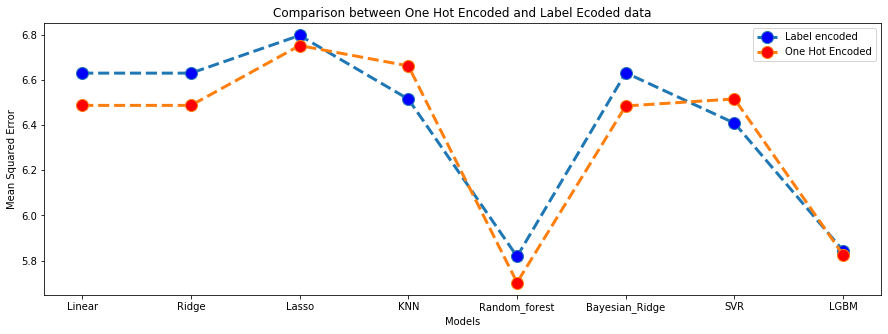

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))
plt.plot(models,mse_label,label = "Label encoded",linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.plot(models, mse_one_hot,label = "One Hot Encoded",linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12)
plt.title("Comparison between One Hot Encoded and Label Ecoded data")
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()